## 영상정보처리 6주차 과제 템플리트
- 점수: 10점 만점
- 이미지 경로 잘못 사용한 경우: -3

이름: 김경민            
학번: 32200327


다음의 경로는 변경하지 말것

In [ ]:
from google.colab import drive 
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Classroom/[22-1 영상정보처리] 2000004793-2022-1/ImageProcClass/Notebook-week5/
!pwd

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Classroom/[22-1 영상정보처리] 2000004793-2022-1/ImageProcClass/Notebook-week5
/gdrive/My Drive/Classroom/[22-1 영상정보처리] 2000004793-2022-1/ImageProcClass/Notebook-week5


In [ ]:
image_path = '../Dongkeun-OpenCV-ImgData/lena.jpg' 

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

##문제 1: 5점


1. 주어진 영상을 읽어 들인다 (org_img)
2. 입력 영상과 같은 크기의 빈 컬러 이미지를 만든다 (new_image)
3. 공백 이미지(new_image) 를 2 x 2 로 분할하여 4개의 서브이미지 영역을 구분한다.
4. 오른쪽 위를 1 영역이라고 하고, 시계 방향으로 2, 3, 4 영역이라고 한다. 
5. 1영역은 blue channel 값만을 가지고, 2영역은 green channel, 3영역은 red channel 값만 가지고, 4 영역은 3개의 channel 이 merging 된 영상을 집어 넣는다.
6. new_image 를 출력한다. 





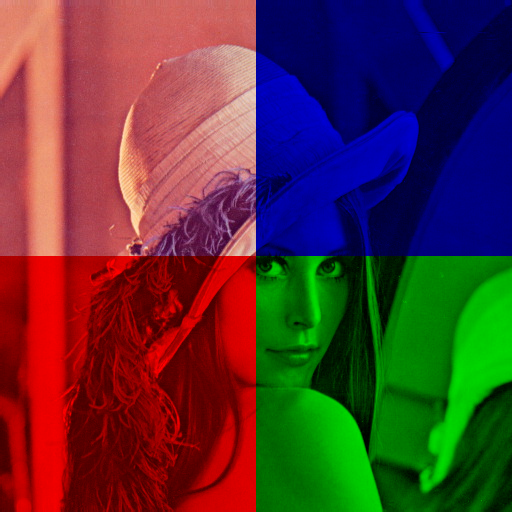

In [ ]:
org_img  = cv2.imread(image_path)
new_image = np.zeros((org_img.shape),dtype="uint8")
row,col,_ = new_image.shape

new_image[0:int(row/2),int(col/2):col,0] = org_img[0:int(row/2),int(col/2):col,0] # sub1
new_image[int(row/2):row,int(col/2):col,1] = org_img[int(row/2):row,int(col/2):col,1] # sub2
new_image[int(row/2):row,0:int(col/2),2] = org_img[int(row/2):row,0:int(col/2),2] # sub3
new_image[0:int(row/2),0:int(col/2),::] = org_img[0:int(row/2),0:int(col/2),::] # sub4

cv2_imshow(new_image)

### 문제 2: 5점
강의자료 2022-1 ImgProc JB - CH05-Updated2103.pdf 에 있는 예제 중, 07.bitwise_op.py 와 08.bitwise_overlap.py 의 예제를 이 노트북에서 실행시키고, 각 라인을 분석해서 자기 노트를 만들기. 
- 예제에 사용하는 이미지가 '../Dongkeun-OpenCV-ImgData' 폴더에 없는 경우, 공유한 소스코드 폴더에서 필요한 이미지를 '../Dongkeun-OpenCV-ImgData' 에 복사해서 사용할 것. 


image1


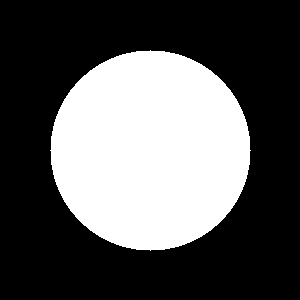

image2


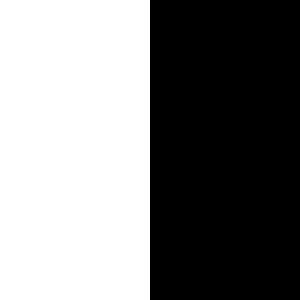

bitwise_or


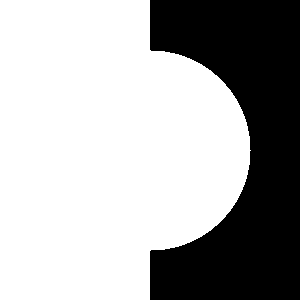

bitwise_and


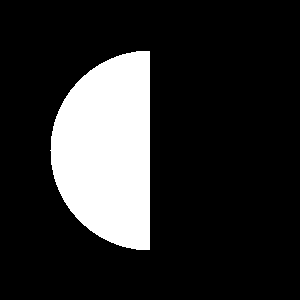

bitwise_xor


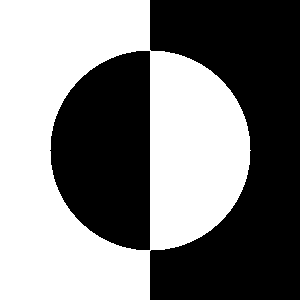

bitwise_not


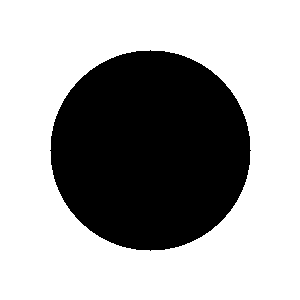

In [ ]:
import numpy as  np, cv2

image1 = np.zeros((300,300),np.uint8) #300,300 검은 화면
image2 = image1.copy()   #완전 복사

h, w = image1.shape[:2]
cx, cy = int(w/2), int(h/2)
cv2.circle(image1,(cx, cy),100,255,-1) #중심에 반지름 100 꽉채운 하얀원 그리기
cv2.rectangle(image2,(0,0,cx,h),255,-1) #원본의 가로 절반을 꼭채운 하얀 네모 그리기

image3 = cv2.bitwise_or(image1, image2)  # 하나만 1이어도 1
image4 = cv2.bitwise_and(image1, image2) # 둘다 1이면 1 아니면 0
image5 = cv2.bitwise_xor(image1, image2) # 같으면 0, 다르면 1
image6 = cv2.bitwise_not(image1) # image1의 반대

print("image1")
cv2_imshow(image1)
print("image2")
cv2_imshow(image2)
print("bitwise_or")
cv2_imshow(image3)
print("bitwise_and")
cv2_imshow(image4)
print("bitwise_xor")
cv2_imshow(image5)
print("bitwise_not")
cv2_imshow(image6)

background


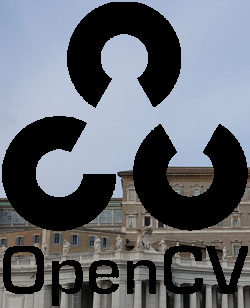

foreground


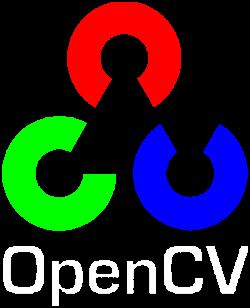

dst


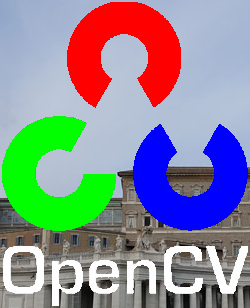

image


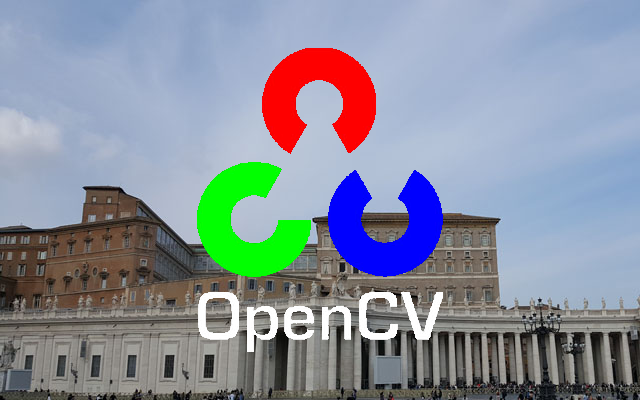

In [102]:
import numpy as np, cv2

image = cv2.imread('../Dongkeun-OpenCV-ImgData/bit_test.jpg',cv2.IMREAD_COLOR)
logo = cv2.imread('../Dongkeun-OpenCV-ImgData/logo.jpg',cv2.IMREAD_COLOR)
if image is None or logo is None: raise Exception("영상파일 읽기 오류")

masks = cv2.threshold(logo, 220,255, cv2.THRESH_BINARY)[1] # 픽셀값이 220 이상이면 225, 아니면 0 설정(이진화)  #컬러 로고를 다 하양으로 바꿈(배경은 검정)
# cv2_imshow(masks)# 출력하면 반영 X(이상...)
masks = cv2.split(masks)

fg_pass_mask = cv2.bitwise_or(masks[0],masks[1]) # b,g 가 하양으로 남음 # 8bit 바이너리 형태로 남음  # 앞서 이진화 시켰기 때문에 bit 연산 가능
#cv2_imshow(fg_pass_mask)
fg_pass_mask = cv2.bitwise_or(masks[2],fg_pass_mask) # b,g,r이 하양으로 남음 
#print("fg_pass_mask") 
#cv2_imshow(fg_pass_mask)
bg_pass_mask = cv2.bitwise_not(fg_pass_mask) # 로고가 검정이 되고 나머지가 하양으로 남음
#print("bg_pass_mask") 
#cv2_imshow(bg_pass_mask)

(H,W), (h,w) = image.shape[:2], logo.shape[:2]
x, y = (W-w)//2, (H-h)//2
roi = image[y:y+h, x:x+w]


# 검정이 하나라도 들어가면 검정, 하양과 합쳐진 컬러는 컬러 살아남음
foreground = cv2.bitwise_and(logo, logo, mask=fg_pass_mask) # logo 와 mask가 bit_and 연산  
background = cv2.bitwise_and(roi, roi, mask=bg_pass_mask)   # 이미지의 roi 와 mask가 bit_and 연산

dst = cv2.add(background,foreground) #background,foreground 합침 
image[y:y+h,x:x+w] = dst # roi 영역을 원본 이미지에 붙힘

print("background") 
cv2_imshow(background)
print("foreground")
cv2_imshow(foreground)
print("dst")
cv2_imshow(dst)
print("image")
cv2_imshow(image)

###모든 픽셀 컬러는 8bit로 표현


*   검정색은 8bit 모두 0으로 표현 
    => and 연산에서는 하나라도 0이면 0이므로 검정이 남음
*   하얀색은 8bit 모두 1로 표현 
    => and 연산에서 하얀색+컬러 하면 컬러 부분이 1이고 하양 부분도 1이기 때문에 컬러 부분이 살아남음



*   로고를 검정 여백을 하양으로 해야 나중에 컬러 image와 and 연산 했을 때, 로고만 검정으로 남는다

